This notebook uses the plots from the following paper to explain Matplotlib is Carsen Stringer, Marius Pachitariu, Nicholas Steinmetz, Matteo Carandini, Kenneth D. Harris, "High-dimensional geometry of population responses in visual cortex", Nature, 2018.

The official repository for the code related to this paper is here: https://github.com/MouseLand/stringer-pachitariu-et-al-2018b

Data for this notebook can be downloaded from https://figshare.com/articles/dataset/Recordings_of_ten_thousand_neurons_in_visual_cortex_in_response_to_2_800_natural_images/6845348

We rely on the following matplotlib book for material https://matplotlib.org/2.0.2/Matplotlib.pdf

# Importing necessary libraries

In [49]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from scipy.stats import zscore

from matplotlib.ticker import NullFormatter 

# Opening .mat data in Python and first plot

We load a \*.mat file containing data into a numpy array and make a fist plot.

In [3]:
import scipy.io as sio
mt = sio.loadmat('natimg2800_M160825_MP027_2016-12-14.mat')

### stimulus responses
resp = mt['stim'][0]['resp'][0]    # stimuli by neurons
istim = mt['stim'][0]['istim'][0]   # identities of stimuli in resp
spont = mt['stim'][0]['spont'][0]  # timepoints by neurons

It is useful to plot shapes of the loaded numpy arrays using .shape

In [9]:
print('Shape of neural response array: {}'.format(resp.shape))
print('Shape of stimulus identity response array: {}'.format(istim.shape))
print('Shape of spontaneous activity array: {}'.format(spont.shape))

Shape of neural response array: (5426, 11449)
Shape of stimulus identity response array: (5426, 1)
Shape of spontaneous activity array: (4696, 11449)


Plot the response of one neuron for 500 first timepoints.

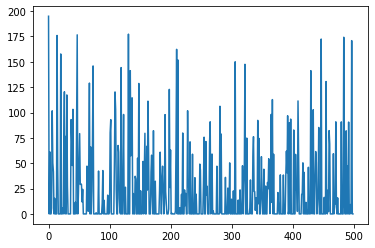

In [10]:
plt.plot(resp[:500,0])

Load stimuli as images using plt.imshow.

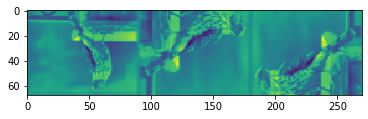

In [8]:
### loading images
mt = sio.loadmat('images_natimg2800_all.mat')
imgs = mt['imgs']  # 68 by 270 by number of images
# check out first image using matplotlib.pyplot
plt.imshow(imgs[:,:,0])

# Chapter 3.1 from Matplotlib book-- Introduction

The Matplotlib book can be found here https://matplotlib.org/2.0.2/Matplotlib.pdf

In [63]:
#z-score the data to have mean 0 and standard deviation 1
zsc=zscore(resp,axis=1)

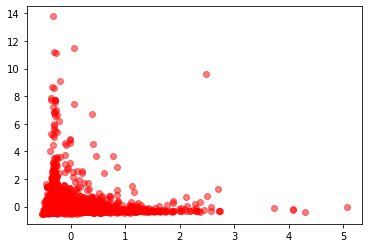

In [32]:
plt.plot(zsc[:,0],zsc[:,1],'ro',alpha=0.5)

Let's transform the raw data!

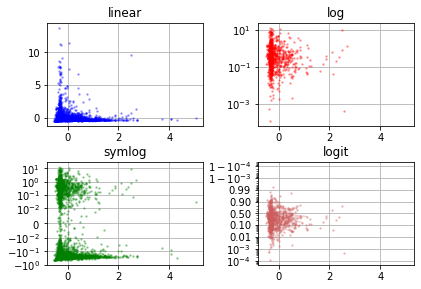

In [61]:
x=zsc[:,0]
y=zsc[:,1]
#plot with various axes scales
plt.figure(1)
# linear
plt.subplot(221)
plt.plot(x, y,'bo',alpha=0.3,markersize=1.5)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.subplot(222)
plt.plot(x,y,'ro',alpha=0.3,markersize=1.5)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean(),'go',alpha=0.3,markersize=1.5)
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

plt.subplot(224)
plt.plot(x, y,marker='o',c='indianred',alpha=0.3,markersize=1.5)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
wspace=0.35)
plt.show()

Plot of zscored neural activities.

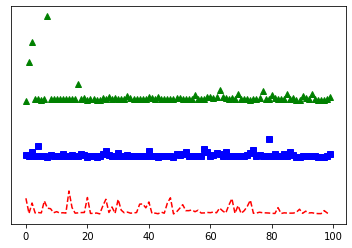

In [30]:
t=range(0,100)
offset=[0,5,10]
plt.plot(t, zsc[:100,0]+offset[0], 'r--',t,zsc[:100,15]+offset[1],'bs',t,zsc[:100,10]+offset[2], 'g^')
plt.yticks([])
plt.show()

But the ticks are confusingly large! Can we make them smaller?

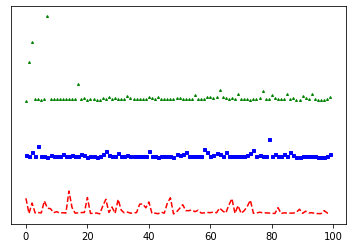

In [31]:
t=range(0,100)
offset=[0,5,10]
plt.plot(t, zsc[:100,0]+offset[0], 'r--',markersize=5)
plt.plot(t,zsc[:100,15]+offset[1],'bs',markersize=3)
plt.plot(t,zsc[:100,10]+offset[2], 'g^',markersize=2)
plt.yticks([])
plt.show()

Let's annotate an outlier.

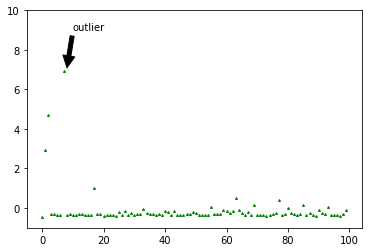

In [78]:
t=range(0,100)
plt.plot(t,zsc[:100,10], 'g^',markersize=2)
plt.annotate('outlier', xy=(8, 7), xytext=(10, 9), arrowprops=dict(facecolor='black', shrink=0.05),)
plt.ylim(-1,10)
plt.show()

We can also use plt.plot() to draw a line and control it's width!

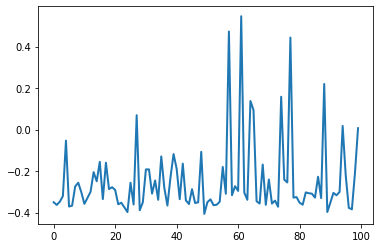

In [33]:
t=range(0,100)
plt.plot(t, zsc[:100,99], linewidth=2.0)

You can also set multiple properties using the .setp() function on the line object.

[None]

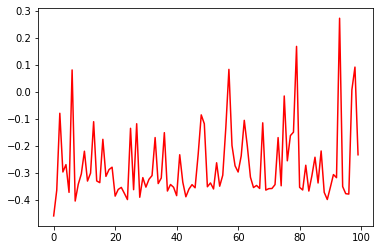

In [38]:
line,=plt.plot(t,zsc[:100,150])
plt.setp(line,color='r')

To get a list of settable line properties, call the setp() function with a line or lines as argument

In [37]:
plt.setp(line)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

Exercise: Play around with the setp properties according to the list given above to set various properties of the plot!

# Chapter 3.2--Intermediate